# FLIPKART'S LAPTOP PRICE PREDICTION

### ML Project- Regression Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('11_9_2022_LAPTOP_Sahi_wala_data.csv')

In [3]:
df.head(1)

,Unnamed: 0,New_ID,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,NaN,NaN,NaN


In [4]:
df.drop(columns=['Unnamed: 0','Unnamed: 10','Unnamed: 11','Unnamed: 12','New_ID'],inplace=True)

In [5]:
df.head(4)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,256 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display


In [6]:
df.info() #information about DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LAPTOP NAME      984 non-null    object
 1   LAPTOP FEATURES  984 non-null    object
 2   PRICE            984 non-null    int64 
 3   PROCESSORS       984 non-null    object
 4   RAM              984 non-null    object
 5   STORAGE          935 non-null    object
 6   OS               984 non-null    object
 7   INCHES           984 non-null    object
dtypes: int64(1), object(7)
memory usage: 61.6+ KB


In [7]:
df.duplicated().sum() #finding number of duplicate entries.

280

In [8]:
df[['LAPTOP NAME','LAPTOP FEATURES','PROCESSORS','RAM','STORAGE','PRICE','INCHES','OS']].duplicated().sum()

280

In [9]:
df.drop_duplicates(inplace=True) #dropping duplicate entries.

In [10]:
df.shape

(704, 8)

In [11]:
df.duplicated().sum() #rechecking number of duplicate entries if any.

0

In [12]:
df.info() #information about DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 0 to 982
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LAPTOP NAME      704 non-null    object
 1   LAPTOP FEATURES  704 non-null    object
 2   PRICE            704 non-null    int64 
 3   PROCESSORS       704 non-null    object
 4   RAM              704 non-null    object
 5   STORAGE          695 non-null    object
 6   OS               704 non-null    object
 7   INCHES           704 non-null    object
dtypes: int64(1), object(7)
memory usage: 49.5+ KB


In [13]:
df.isnull().sum() #STORAGE have 9 NULL values.

LAPTOP NAME        0
LAPTOP FEATURES    0
PRICE              0
PROCESSORS         0
RAM                0
STORAGE            9
OS                 0
INCHES             0
dtype: int64

In [14]:
df['STORAGE'].sample(30)

48                512 GB SSD
761                 1 TB SSD
880               256 GB SSD
308               256 GB SSD
128                 1 TB SSD
358               512 GB SSD
725                 1 TB SSD
578               512 GB SSD
817                 1 TB HDD
560      1 TB HDD|256 GB SSD
469                 1 TB SSD
438               512 GB SSD
801               256 GB SSD
26                256 GB SSD
878               256 GB SSD
602                 1 TB SSD
352               512 GB SSD
633    512 GB HDD|512 GB SSD
418               512 GB SSD
876                 1 TB SSD
900               512 GB SSD
47                512 GB SSD
853               512 GB SSD
336               512 GB SSD
56       1 TB HDD|256 GB SSD
733               512 GB SSD
665      1 TB HDD|256 GB SSD
214      1 TB HDD|256 GB SSD
62                512 GB SSD
886      1 TB HDD|256 GB SSD
Name: STORAGE, dtype: object

In [15]:
df = df.dropna(subset=['STORAGE']) #dropping all those rows which contains 'NaN' values of STORAGE.

In [16]:
df.shape #checking shape of DataFrame.

(695, 8)

In [17]:
df.isnull().sum()

LAPTOP NAME        0
LAPTOP FEATURES    0
PRICE              0
PROCESSORS         0
RAM                0
STORAGE            0
OS                 0
INCHES             0
dtype: int64

In [18]:
df.info() #information about DataFrame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 982
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LAPTOP NAME      695 non-null    object
 1   LAPTOP FEATURES  695 non-null    object
 2   PRICE            695 non-null    int64 
 3   PROCESSORS       695 non-null    object
 4   RAM              695 non-null    object
 5   STORAGE          695 non-null    object
 6   OS               695 non-null    object
 7   INCHES           695 non-null    object
dtypes: int64(1), object(7)
memory usage: 48.9+ KB


In [19]:
df.head(2)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display


In [20]:
#df.to_csv('695_laptop_data.csv')

In [21]:
df['HDD'] = df['STORAGE'].apply(lambda x : x if 'HDD' in x else 0)
df['SSD'] = df['STORAGE'].apply(lambda x : x if 'SSD' in x else 0)

In [22]:
df.sample(10)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,HDD,SSD
950,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",33999,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,256 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,256 GB SSD
109,MSI Core i3 10th Gen - (8 GB/512 GB SSD/Window...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",31990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,512 GB SSD
309,ASUS ROG Strix G15 (2022) Ryzen 7 Octa Core - ...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR5 RA...",101990,AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512 GB SSD
946,HP 14s Core i3 10th Gen - (8 GB/512 GB SSD/Win...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",51999,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 Inch) Display,0,512 GB SSD
33,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,"Intel Core i3 Processor (11th Gen), 8 GB DDR4 ...",43790,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,1 TB HDD|256 GB SSD,1 TB HDD|256 GB SSD
378,Lenovo Yoga 6 Ryzen 5 Hexa Core 5500U - (16 GB...,"AMD Ryzen 5 Hexa Core Processor, 16 GB DDR4 RA...",72990,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,33.78 cm (13.3 inch) Touchscreen Display,0,512 GB SSD
894,ASUS TUF Dash F15 Core i5 11th Gen - (16 GB/51...,"Intel Core i5 Processor (11th Gen), 16 GB DDR4...",84990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512 GB SSD
954,Lenovo IdeaPad Core i5 11th Gen - (8 GB/512 GB...,"Intel Core i5 Processor (11th Gen), 8 GB DDR4 ...",57999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 Inch) Display,0,512 GB SSD
21,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,"Intel Core i3 Processor (11th Gen), 8 GB DDR4 ...",34990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,64 bit Windows 11 Operating System,35.56 cm (14 inch) Display,0,256 GB SSD
318,Lenovo Legion 5 Ryzen 7 Octa Core 5800H - (16 ...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR4 RA...",129990,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,2 TB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,2 TB SSD


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 982
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LAPTOP NAME      695 non-null    object
 1   LAPTOP FEATURES  695 non-null    object
 2   PRICE            695 non-null    int64 
 3   PROCESSORS       695 non-null    object
 4   RAM              695 non-null    object
 5   STORAGE          695 non-null    object
 6   OS               695 non-null    object
 7   INCHES           695 non-null    object
 8   HDD              695 non-null    object
 9   SSD              695 non-null    object
dtypes: int64(1), object(9)
memory usage: 59.7+ KB


#HDD COLUMN : 

In [24]:
df['HDD'].dtypes

dtype('O')

In [25]:
def splitting_HDD(x):
  if x == 0 :
    return 0
  else:
    return x.split('|')[0]

In [26]:
df['HDD'] = df['HDD'].apply(splitting_HDD)

In [27]:
df['HDD'].value_counts()

0             596
1 TB HDD       94
512 GB HDD      3
2 TB HDD        1
500 GB HDD      1
Name: HDD, dtype: int64

In [28]:
df.head(2)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,HDD,SSD
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512 GB SSD
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512 GB SSD


In [29]:
def splitting_by_space(x):
  if x == 0 :
    return 0
  else:
    return x.split(' ')[0]

In [30]:
df['HDD'] = df['HDD'].apply(splitting_by_space)
df.sample(10)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,HDD,SSD
589,ASUS Core i3 11th Gen - (8 GB/256 GB SSD/Windo...,"Intel Core i3 Processor (11th Gen), 8 GB DDR4 ...",35490,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,256 GB SSD
956,Lenovo V15 Core i3 11th Gen - (4 GB/256 GB SSD...,"Intel Core i3 Processor (11th Gen), 4 GB DDR4 ...",34990,Intel Core i3 Processor (11th Gen),4 GB DDR4 RAM,256 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,256 GB SSD
626,ASUS ROG Flow X16 Ryzen 7 Octa Core 6800HS - (...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR5 RA...",191990,AMD Ryzen 7 Octa Core Processor,16 GB DDR5 RAM,1 TB SSD,64 bit Windows 11 Operating System,40.64 cm (16 Inch) Touchscreen Display,0,1 TB SSD
749,DELL Inspiron Core i5 11th Gen - (16 GB/512 GB...,"Intel Core i5 Processor (11th Gen), 16 GB DDR4...",69990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 inches) Display,0,512 GB SSD
926,HP Core i3 11th Gen - (8 GB/1 TB HDD/Windows 1...,"Intel Core i3 Processor (11th Gen), 8 GB DDR4 ...",40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD,Windows 10 Operating System,35.81 cm (14.1 inch) Display,1,0
28,ASUS VivoBook 14 (2021) Ryzen 5 Quad Core 3500...,"AMD Ryzen 5 Quad Core Processor, 8 GB DDR4 RAM...",37990,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,512 GB SSD,32 bit Windows 11 Operating System,35.56 cm (14 inch) Display,0,512 GB SSD
10,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512 GB SSD
133,Lenovo Ideapad Gaming 3 Core i5 11th Gen - (16...,"Intel Core i5 Processor (11th Gen), 16 GB DDR4...",67990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,1 TB HDD|256 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,1,1 TB HDD|256 GB SSD
40,ASUS VivoBook K15 OLED Ryzen 7 Octa Core 5700U...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR4 RA...",59990,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512 GB SSD
726,ASUS ExpertBook P1 Core i5 10th Gen - (4 GB/1 ...,"Intel Core i5 Processor (10th Gen), 4 GB DDR4 ...",61249,Intel Core i5 Processor (10th Gen),4 GB DDR4 RAM,1 TB HDD,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,1,0


In [32]:
df['HDD'] = df['HDD'].astype('int64')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 982
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LAPTOP NAME      695 non-null    object
 1   LAPTOP FEATURES  695 non-null    object
 2   PRICE            695 non-null    int64 
 3   PROCESSORS       695 non-null    object
 4   RAM              695 non-null    object
 5   STORAGE          695 non-null    object
 6   OS               695 non-null    object
 7   INCHES           695 non-null    object
 8   HDD              695 non-null    int64 
 9   SSD              695 non-null    object
dtypes: int64(2), object(8)
memory usage: 59.7+ KB


In [34]:
df['HDD'].value_counts()

0      596
1       94
512      3
2        1
500      1
Name: HDD, dtype: int64

In [35]:
def convert_HDD_1000(x):
  if x == 1:
    return 1000
  elif x== 2:
    return 2000
  elif x == 512:
    return 512
  elif x == 500:
    return 500
  else:
    return 0


In [36]:
df['HDD'] = df['HDD'].apply(convert_HDD_1000)

In [37]:
df.sample(5)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,HDD,SSD
24,Lenovo IdeaPad 3 Ryzen 5 Hexa Core 5500U - (8 ...,"AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RAM...",45990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512 GB SSD
13,ASUS VivoBook Ultra 14 (2022) Core i5 11th Gen...,"Intel Core i5 Processor (11th Gen), 16 GB DDR4...",52990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,35.56 cm (14 inch) Display,0,512 GB SSD
120,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core 5800...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR4 RA...",72990,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512 GB SSD
480,HP Core i3 11th Gen - (8 GB/1 TB HDD/Windows 1...,"Intel Core i3 Processor (11th Gen), 8 GB DDR4 ...",40490,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD,64 bit Windows 10 Operating System,39.62 cm (15.6 Inch) Display,1000,0
205,ASUS ROG Flow X13 Ryzen 9 Octa Core 5900HS - (...,"AMD Ryzen 9 Octa Core Processor, 32 GB LPDDR4X...",112990,AMD Ryzen 9 Octa Core Processor,32 GB LPDDR4X RAM,1 TB SSD,64 bit Windows 10 Operating System,34.04 cm (13.4 inch) Touchscreen Display,0,1 TB SSD


In [38]:
df['HDD'].value_counts()

0       596
1000     94
512       3
2000      1
500       1
Name: HDD, dtype: int64

#SSD COLUMN : 

In [39]:
def splitting_SSD(y):
  if y == 0 :
    return 0
  else:
    return y.split('|')[-1]

In [40]:
df['SSD'] = df['SSD'].apply(splitting_SSD)

In [41]:
df.sample(5)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,HDD,SSD
262,ASUS Zenbook 14 ScreenPad Touch Panel Core i5 ...,"Intel Core i5 Processor (11th Gen), 8 GB LPDDR...",79990,Intel Core i5 Processor (11th Gen),8 GB LPDDR4X RAM,512 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 inch) Touchscreen Display,0,512 GB SSD
320,ASUS Vivobook 15 Core i5 11th Gen - (8 GB + 32...,"Intel Core i5 Processor (11th Gen), 8 GB DDR4 ...",51390,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512 GB SSD
134,MSI GF65 Thin Core i7 10th Gen - (16 GB/1 TB S...,"Intel Core i7 Processor (10th Gen), 16 GB DDR4...",89990,Intel Core i7 Processor (10th Gen),16 GB DDR4 RAM,1 TB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,1 TB SSD
450,ASUS ROG Zephyrus Duo 16 Ryzen 9 Octa Core 690...,"AMD Ryzen 9 Octa Core Processor, 32 GB DDR5 RA...",391990,AMD Ryzen 9 Octa Core Processor,32 GB DDR5 RAM,2 TB SSD,64 bit Windows 11 Operating System,40.64 cm (16 Inch) Display,0,2 TB SSD
866,Lenovo Ideapad Slim 3i (2021) Core i3 10th Gen...,"Intel Core i3 Processor (10th Gen), 4 GB DDR4 ...",40200,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,256 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 Inch) Display,0,256 GB SSD


In [42]:
df['SSD'] = df['SSD'].apply(splitting_by_space)
df.sample(10)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,HDD,SSD
854,Lenovo Ideapad Slim 3i (2021) Core i5 11th Gen...,"Intel Core i5 Processor (11th Gen), 8 GB DDR4 ...",57999,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 Inch) Display,0,512
272,ASUS Core i5 10th Gen - (8 GB/256 GB SSD/Windo...,"Intel Core i5 Processor (10th Gen), 8 GB DDR4 ...",41390,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,256 GB SSD,Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,256
416,HP Ryzen 3 Quad Core 5300U - (8 GB/256 GB SSD/...,"AMD Ryzen 3 Quad Core Processor, 8 GB DDR4 RAM...",47873,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,256 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,256
784,acer Swift 7 Core i5 7th Gen - (8 GB/256 GB SS...,"Intel Core i5 Processor (7th Gen), 8 GB DDR3 R...",86867,Intel Core i5 Processor (7th Gen),8 GB DDR3 RAM,256 GB SSD,64 bit Windows 10 Operating System,33.78 cm (13.3 inch) Display,0,256
264,acer Aspire 3 Ryzen 5 Quad Core 3500U - (8 GB/...,"AMD Ryzen 5 Quad Core Processor, 8 GB DDR4 RAM...",39990,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512
948,Lenovo Ideapad Slim 5 Ryzen 7 Octa Core 5700U ...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR4 RA...",84999,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512
952,Avita Liber Core i7 8th Gen - (8 GB/256 GB SSD...,"Intel Core i7 Processor (8th Gen), 8 GB DDR4 R...",73990,Intel Core i7 Processor (8th Gen),8 GB DDR4 RAM,256 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,256
502,Lenovo Legion 5 Ryzen 5 Hexa Core 5600H - (8 G...,"AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RAM...",73999,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512
273,DELL Inspiron Core i5 11th Gen - (16 GB/512 GB...,"Intel Core i5 Processor (11th Gen), 16 GB DDR4...",69890,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512
336,ASUS VivoBook Ultra K14 (2021) Ryzen 5 Hexa Co...,"AMD Ryzen 5 Hexa Core Processor, 8 GB DDR4 RAM...",49990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,512


In [43]:
df['SSD'] = df['SSD'].astype('int64')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 982
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LAPTOP NAME      695 non-null    object
 1   LAPTOP FEATURES  695 non-null    object
 2   PRICE            695 non-null    int64 
 3   PROCESSORS       695 non-null    object
 4   RAM              695 non-null    object
 5   STORAGE          695 non-null    object
 6   OS               695 non-null    object
 7   INCHES           695 non-null    object
 8   HDD              695 non-null    int64 
 9   SSD              695 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 59.7+ KB


In [45]:
df['SSD'].value_counts()

512    375
256    156
1       99
0       50
128      7
2        7
32       1
Name: SSD, dtype: int64

In [46]:
def convert_SSD_1000(x):
  if x==1:
    return 1000
  elif x==2:
    return 2000
  elif x==512:
    return 512
  elif x==256:
    return 256
  elif x==128:
    return 128
  elif x==0:
    return 0
  elif x==32:
    return 32          

In [47]:
df['SSD']=df['SSD'].apply(convert_SSD_1000)


In [48]:
df.sample(10)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,HDD,SSD
64,DELL Vostro Core i3 10th Gen - (8 GB/1 TB HDD/...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",41790,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,1000,256
25,acer Extensa Core i3 11th Gen - (8 GB/256 GB S...,"Intel Core i3 Processor (11th Gen), 8 GB DDR4 ...",31990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,256 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,256
588,MSI Prestige 14 EVO Core i5 11th Gen - (16 GB/...,"Intel Core i5 Processor (11th Gen), 16 GB LPDD...",80490,Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,512 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,512
53,MSI Modern 14 Core i5 10th Gen - (8 GB/512 GB ...,"Intel Core i5 Processor (10th Gen), 8 GB DDR4 ...",41990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,512
348,ASUS VivoBook 14 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",34490,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,256 GB SSD,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,256
930,DELL Inspiron 5518 Core i5 11th Gen - (16 GB/5...,"Intel Core i5 Processor (11th Gen), 16 GB DDR4...",70990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512
345,ASUS Vivobook 15 Core i3 11th Gen - (8 GB/512 ...,"Intel Core i3 Processor (11th Gen), 8 GB DDR4 ...",39870,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512
600,ASUS Zenbook Flip 13 OLED Touch Panel Intel EV...,"Intel Core i5 Processor (11th Gen), 16 GB LPDD...",77990,Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,512 GB SSD,64 bit Windows 11 Operating System,33.78 cm (13.3 Inch) Touchscreen Display,0,512
462,ASUS Ryzen 7 Octa Core 5800HS - (16 GB/512 GB ...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR4 RA...",95990,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,35.56 cm (14 Inch) Display,0,512
113,HP Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",32990,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 mm) Display,0,256


In [49]:
df['SSD'].value_counts()

512     375
256     156
1000     99
0        50
128       7
2000      7
32        1
Name: SSD, dtype: int64

In [50]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,STORAGE,OS,INCHES,HDD,SSD
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,256 GB SSD,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,256
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16 GB DDR4 RAM,512 GB SSD,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512


In [51]:
df.drop(columns='STORAGE',inplace=True)

In [52]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,256
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512


#RAM COLUMN

In [53]:
df.head(2)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512


In [54]:
df['RAM']=df['RAM'].astype(str).str.extract("(\\w+)")  ## using regex

In [55]:
df.sample(10)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD
790,ASUS ZenBook Duo Core i7 10th Gen - (16 GB/1 T...,"Intel Core i7 Processor (10th Gen), 16 GB LPDD...",124990,Intel Core i7 Processor (10th Gen),16,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,1000
72,HP Pavilion Ryzen 5 Hexa Core 5625U - (16 GB/5...,"AMD Ryzen 5 Hexa Core Processor, 16 GB DDR4 RA...",60990,AMD Ryzen 5 Hexa Core Processor,16,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512
676,ASUS Vivobook 15 Core i5 11th Gen - (8 GB/512 ...,"Intel Core i5 Processor (11th Gen), 8 GB DDR4 ...",50990,Intel Core i5 Processor (11th Gen),8,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512
800,ASUS Ryzen 5 Quad Core 3rd Gen - (8 GB/512 GB ...,"AMD Ryzen 5 Quad Core Processor (3rd Gen), 8 G...",44500,AMD Ryzen 5 Quad Core Processor (3rd Gen),8,Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512
508,acer Predator Helios 300 Core i7 12th Gen - (1...,"Intel Core i7 Processor (12th Gen), 16 GB DDR5...",154990,Intel Core i7 Processor (12th Gen),16,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,1000
965,Lenovo ThinkPad E14 Gen2 Ryzen 5 Hexa Core 465...,"AMD Ryzen 5 Hexa Core Processor (5th Gen), 8 G...",58990,AMD Ryzen 5 Hexa Core Processor (5th Gen),8,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,256
45,HP Core i5 11th Gen - (8 GB/512 GB SSD/Windows...,"Intel Core i5 Processor (11th Gen), 8 GB DDR4 ...",50099,Intel Core i5 Processor (11th Gen),8,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512
277,MSI Core i5 11th Gen - (8 GB/512 GB SSD/Window...,"Intel Core i5 Processor (11th Gen), 8 GB DDR4 ...",44990,Intel Core i5 Processor (11th Gen),8,64 bit Windows 10 Operating System,35.56 cm (14 inch) Display,0,512
186,HP Celeron Dual Core - (8 GB/256 GB SSD/Window...,"Dual_Core Processor, 8 GB DDR4 RAM, 64 bit Win...",28990,Intel Celeron Dual_Core Processor,8,64 bit Windows 11 Operating System,35.56 cm (14 Inch) Display,0,256
728,DELL Ryzen 7 Octa Core 6800H - (16 GB/512 GB S...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR5 RA...",125990,AMD Ryzen 7 Octa Core Processor,16,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512


In [56]:
df['RAM'].value_counts()

8     405
16    228
4      45
32     17
Name: RAM, dtype: int64

In [57]:
df['RAM']=df['RAM'].astype('int64')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 982
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   LAPTOP NAME      695 non-null    object
 1   LAPTOP FEATURES  695 non-null    object
 2   PRICE            695 non-null    int64 
 3   PROCESSORS       695 non-null    object
 4   RAM              695 non-null    int64 
 5   OS               695 non-null    object
 6   INCHES           695 non-null    object
 7   HDD              695 non-null    int64 
 8   SSD              695 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 54.3+ KB


# LAPTOP COMPANY COLUMN

In [59]:
df['LAPTOP COMPANY']= df['LAPTOP NAME'].str.extract("(\\w+)")

In [60]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512,Lenovo
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512,Lenovo
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,256,Lenovo
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512,Lenovo
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512,ASUS


In [61]:
df['LAPTOP COMPANY'].value_counts()

ASUS         212
DELL         121
HP           114
Lenovo       108
acer          52
MSI           37
APPLE         15
Infinix        7
Avita          7
LG             5
ALIENWARE      4
realme         2
RedmiBook      2
Nokia          2
SAMSUNG        2
Vaio           2
Mi             1
lenovo         1
MICROSOFT      1
Name: LAPTOP COMPANY, dtype: int64

# TOUCHSCREEN COLUMN

In [62]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512,Lenovo
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512,Lenovo
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,256,Lenovo
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512,Lenovo
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512,ASUS


In [63]:
df['TOUCHSCREEN'] = df['INCHES'].apply(lambda x : 1 if 'Touchscreen Display' in x else 0)

In [64]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,64 bit Windows 10 Operating System,39.62 cm (15.6 inch) Display,0,512,Lenovo,0
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512,Lenovo,0
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,256,Lenovo,0
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,64 bit Windows 11 Operating System,39.62 cm (15.6 Inch) Display,0,512,Lenovo,0
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,64 bit Windows 11 Operating System,39.62 cm (15.6 inch) Display,0,512,ASUS,0


In [65]:
df['TOUCHSCREEN'].value_counts()

0    605
1     90
Name: TOUCHSCREEN, dtype: int64

#INCHES COLUMN

In [66]:
df['INCHES']=df['INCHES'].str.extract("\(([\d\.+]+) \w+\)")

In [67]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,64 bit Windows 10 Operating System,15.6,0,512,Lenovo,0
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,64 bit Windows 11 Operating System,15.6,0,512,Lenovo,0
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11 Operating System,15.6,0,256,Lenovo,0
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,64 bit Windows 11 Operating System,15.6,0,512,Lenovo,0
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,64 bit Windows 11 Operating System,15.6,0,512,ASUS,0


In [68]:
df['INCHES'].value_counts()

15.6      369
14        200
13.3       38
16         13
17.3       13
13.4       11
14.96       9
14.1        8
16.1        8
15          5
13          4
11.6        4
13.5        4
13.6        3
16.6        1
35          1
15.748      1
14.2        1
15.3        1
14.22       1
Name: INCHES, dtype: int64

In [69]:
df['INCHES']=df['INCHES'].astype('float')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 982
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LAPTOP NAME      695 non-null    object 
 1   LAPTOP FEATURES  695 non-null    object 
 2   PRICE            695 non-null    int64  
 3   PROCESSORS       695 non-null    object 
 4   RAM              695 non-null    int64  
 5   OS               695 non-null    object 
 6   INCHES           695 non-null    float64
 7   HDD              695 non-null    int64  
 8   SSD              695 non-null    int64  
 9   LAPTOP COMPANY   695 non-null    object 
 10  TOUCHSCREEN      695 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 65.2+ KB


#PROCESSOR BRAND :

In [71]:
df['PROCESSOR BRAND'] = df['PROCESSORS'].astype(str).str.extract("(\\w+)")

In [72]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,64 bit Windows 10 Operating System,15.6,0,512,Lenovo,0,Intel
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,64 bit Windows 11 Operating System,15.6,0,512,Lenovo,0,Intel
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11 Operating System,15.6,0,256,Lenovo,0,Intel
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,64 bit Windows 11 Operating System,15.6,0,512,Lenovo,0,AMD
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,64 bit Windows 11 Operating System,15.6,0,512,ASUS,0,AMD


In [73]:
df['PROCESSOR BRAND'].value_counts()

Intel    485
AMD      198
Apple     12
Name: PROCESSOR BRAND, dtype: int64

# PROCESSOR NAME

In [74]:
df.sample(10)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND
837,Avita Liber Core i7 8th Gen - (8 GB/256 GB SSD...,"Intel Core i7 Processor (8th Gen), 8 GB DDR4 R...",73990,Intel Core i7 Processor (8th Gen),8,64 bit Windows 10 Operating System,14.0,0,256,Avita,0,Intel
122,acer Nitro 5 Ryzen 7 Octa Core 5800H - (16 GB/...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR4 RA...",94960,AMD Ryzen 7 Octa Core Processor,16,64 bit Windows 10 Operating System,15.6,1000,256,acer,0,AMD
924,HP 14s Core i5 11th Gen - (8 GB/512 GB SSD/Win...,"Intel Core i5 Processor (11th Gen), 8 GB DDR4 ...",56990,Intel Core i5 Processor (11th Gen),8,64 bit Windows 10 Operating System,14.0,0,512,HP,0,Intel
193,Lenovo ThinkPad E15 Core i5 11th Gen - (8 GB/5...,"Intel Core i5 Processor (11th Gen), 8 GB DDR4 ...",63990,Intel Core i5 Processor (11th Gen),8,64 bit Windows 10 Operating System,15.6,0,512,Lenovo,0,Intel
821,DELL Ryzen 7 Octa Core 6800H - (16 GB/512 GB S...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR5 RA...",100990,AMD Ryzen 7 Octa Core Processor,16,64 bit Windows 11 Operating System,15.6,0,512,DELL,0,AMD
872,ASUS ASUS TUF Dash Core i5 11th Gen - (16 GB/5...,"Intel Core i5 Processor (11th Gen), 16 GB DDR4...",85990,Intel Core i5 Processor (11th Gen),16,64 bit Windows 10 Operating System,15.6,0,512,ASUS,0,Intel
150,APPLE 2022 MacBook AIR M2 - (8 GB/512 GB SSD/M...,"Apple M2 Processor, 8 GB Unified Memory RAM, M...",149900,Apple M2 Processor,8,Mac OS Operating System,13.6,0,512,APPLE,0,Apple
866,Lenovo Ideapad Slim 3i (2021) Core i3 10th Gen...,"Intel Core i3 Processor (10th Gen), 4 GB DDR4 ...",40200,Intel Core i3 Processor (10th Gen),4,64 bit Windows 10 Operating System,15.6,0,256,Lenovo,0,Intel
562,DELL Core i3 11th Gen - (8 GB/1 TB HDD/Windows...,"Intel Core i3 Processor (11th Gen), 8 GB DDR4 ...",42690,Intel Core i3 Processor (11th Gen),8,Windows 11 Operating System,15.6,1000,0,DELL,0,Intel
664,LG Gram 15 Core i5 10th Gen - (8 GB/256 GB SSD...,"Intel Core i5 Processor (10th Gen), 8 GB DDR4 ...",73990,Intel Core i5 Processor (10th Gen),8,64 bit Windows 10 Operating System,15.6,0,256,LG,0,Intel


In [75]:
df['PROCESSORS'].value_counts()

Intel Core i5 Processor (11th Gen)            121
Intel Core i3 Processor (11th Gen)             95
AMD Ryzen 5 Hexa Core Processor                58
AMD Ryzen 7 Octa Core Processor                56
Intel Core i5 Processor (10th Gen)             51
                                             ... 
Intel Hexa Core i5 Processor (10th Gen)         1
AMD Ryzen 3 Hexa Core Processor (4th Gen)       1
AMD Ryzen 5 Dual Core Processor                 1
Intel Celeron Quad_Core Processor               1
AMD Ryzen 7 Quad Core Processor (10th Gen)      1
Name: PROCESSORS, Length: 63, dtype: int64

In [76]:
df['PROCESSORS NAME'] = df['PROCESSORS'].apply(lambda x : " ".join(x.split(' ')[0:3])) 

In [77]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,64 bit Windows 10 Operating System,15.6,0,512,Lenovo,0,Intel,Intel Core i7
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,64 bit Windows 11 Operating System,15.6,0,512,Lenovo,0,Intel,Intel Core i5
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11 Operating System,15.6,0,256,Lenovo,0,Intel,Intel Core i3
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,64 bit Windows 11 Operating System,15.6,0,512,Lenovo,0,AMD,AMD Ryzen 3
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,64 bit Windows 11 Operating System,15.6,0,512,ASUS,0,AMD,AMD Ryzen 7


In [78]:
df['PROCESSORS NAME'].value_counts()

Intel Core i5              222
Intel Core i3              141
Intel Core i7               93
AMD Ryzen 5                 74
AMD Ryzen 7                 68
AMD Ryzen 3                 28
AMD Ryzen 9                 19
Intel Core i9               10
Intel Pentium Quad           8
Apple M1 Processor           7
Intel Celeron Dual_Core      6
AMD Athlon Dual              5
Apple M2 Processor           4
AMD Dual Core                3
Intel Pentium Silver         3
Intel Hexa Core              1
Intel Celeron Quad_Core      1
Apple M1 Pro                 1
AMD APU Dual                 1
Name: PROCESSORS NAME, dtype: int64

In [79]:
def fetch_processor_name(text):
  if text =='Intel Core i3' or text =='Intel Core i5' or text =='Intel Core i7' or text =='Intel Core i9' or text =='AMD Ryzen 5' or text =='AMD Ryzen 3' or text =='AMD Ryzen 7' or text =='AMD Ryzen 9' or text=='Apple M1 Processor' or text=='Apple M2 Processor' or text=='Apple M1 Pro':
    return text
  else:
    if text.split()[0]=="Intel":
      return 'Other Intel Processors'
    elif text.split()[0]=="AMD":
      return 'Other AMD Processors'

In [80]:
df['PROCESSORS NAME']=df['PROCESSORS NAME'].apply(fetch_processor_name)

In [81]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,64 bit Windows 10 Operating System,15.6,0,512,Lenovo,0,Intel,Intel Core i7
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,64 bit Windows 11 Operating System,15.6,0,512,Lenovo,0,Intel,Intel Core i5
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11 Operating System,15.6,0,256,Lenovo,0,Intel,Intel Core i3
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,64 bit Windows 11 Operating System,15.6,0,512,Lenovo,0,AMD,AMD Ryzen 3
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,64 bit Windows 11 Operating System,15.6,0,512,ASUS,0,AMD,AMD Ryzen 7


In [82]:
df['PROCESSORS NAME'].value_counts()

Intel Core i5             222
Intel Core i3             141
Intel Core i7              93
AMD Ryzen 5                74
AMD Ryzen 7                68
AMD Ryzen 3                28
Other Intel Processors     19
AMD Ryzen 9                19
Intel Core i9              10
Other AMD Processors        9
Apple M1 Processor          7
Apple M2 Processor          4
Apple M1 Pro                1
Name: PROCESSORS NAME, dtype: int64

In [83]:
df['OS'].value_counts()

64 bit Windows 10 Operating System     309
64 bit Windows 11 Operating System     271
Windows 11 Operating System             52
Windows 10 Operating System             32
Mac OS Operating System                 14
DOS Operating System                     4
 64 bit Windows 10 Operating System      4
Linux/Ubuntu Operating System            2
64 bit DOS Operating System              2
32 bit Windows 11 Operating System       1
64 bit Mac OS Operating System           1
Chrome Operating System                  1
64 bit Windows 8 Operating System        1
Linux Operating System                   1
Name: OS, dtype: int64

In [84]:
def fetch_os(x):
  if 'Windows 10' in x:
    return 'Windows 10'
  elif 'Windows 11' in x:
    return 'Windows 11'
  elif 'Windows 8' in x:
    return 'Windows 8'
  elif 'Mac OS' in x:
    return 'Mac OS'
  elif 'Linux' in x:
    return 'Linux OS'
  elif 'DOS' in x:
    return 'DOS OS'
  else:
    return 'Chrome OS'

In [85]:
df['OS'] = df['OS'].apply(fetch_os) 

In [86]:
df['OS'].value_counts()

Windows 10    345
Windows 11    324
Mac OS         15
DOS OS          6
Linux OS        3
Chrome OS       1
Windows 8       1
Name: OS, dtype: int64

In [87]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,Windows 10,15.6,0,512,Lenovo,0,Intel,Intel Core i7
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,Windows 11,15.6,0,512,Lenovo,0,Intel,Intel Core i5
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11,15.6,0,256,Lenovo,0,Intel,Intel Core i3
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,Windows 11,15.6,0,512,Lenovo,0,AMD,AMD Ryzen 3
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,Windows 11,15.6,0,512,ASUS,0,AMD,AMD Ryzen 7


#GAMING LAPTOP

In [88]:
df['GAMING LAPTOP']=df['LAPTOP NAME'].apply(lambda x: 1 if 'Gaming' in x else 0)

In [89]:
df['GAMING LAPTOP'].value_counts()

0    654
1     41
Name: GAMING LAPTOP, dtype: int64

In [90]:
df.sample(2)

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME,GAMING LAPTOP
122,acer Nitro 5 Ryzen 7 Octa Core 5800H - (16 GB/...,"AMD Ryzen 7 Octa Core Processor, 16 GB DDR4 RA...",94960,AMD Ryzen 7 Octa Core Processor,16,Windows 10,15.6,1000,256,acer,0,AMD,AMD Ryzen 7,0
410,acer Travelmate Core i5 11th Gen - (16 GB/1 TB...,"Intel Core i5 Processor (11th Gen), 16 GB DDR4...",44990,Intel Core i5 Processor (11th Gen),16,Windows 10,14.0,1000,256,acer,0,Intel,Intel Core i5,0


## GRAPHICS CARD

In [91]:
df['GRAPHICS CARD']=df['LAPTOP NAME'].apply(lambda x:1 if 'Graphics' in x else 0)

In [92]:
df.head()

,LAPTOP NAME,LAPTOP FEATURES,PRICE,PROCESSORS,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME,GAMING LAPTOP,GRAPHICS CARD
0,Lenovo IdeaPad Gaming 3i Core i7 11th Gen - (8...,"Intel Core i7 Processor (11th Gen), 8 GB DDR4 ...",69990,Intel Core i7 Processor (11th Gen),8,Windows 10,15.6,0,512,Lenovo,0,Intel,Intel Core i7,1,1
1,Lenovo IdeaPad 3 Core i5 12th Gen - (8 GB/512 ...,"Intel Core i5 Processor (12th Gen), 8 GB DDR4 ...",53990,Intel Core i5 Processor (12th Gen),8,Windows 11,15.6,0,512,Lenovo,0,Intel,Intel Core i5,0,0
2,Lenovo IdeaPad 3 Core i3 10th Gen - (8 GB/256 ...,"Intel Core i3 Processor (10th Gen), 8 GB DDR4 ...",30990,Intel Core i3 Processor (10th Gen),8,Windows 11,15.6,0,256,Lenovo,0,Intel,Intel Core i3,0,0
3,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,"AMD Ryzen 3 Dual Core Processor, 8 GB DDR4 RAM...",31490,AMD Ryzen 3 Dual Core Processor,8,Windows 11,15.6,0,512,Lenovo,0,AMD,AMD Ryzen 3,0,0
4,ASUS Vivobook 15 Ryzen 7 Quad Core AMD R7-3700...,"AMD Ryzen 7 Quad Core Processor, 16 GB DDR4 RA...",44990,AMD Ryzen 7 Quad Core Processor,16,Windows 11,15.6,0,512,ASUS,0,AMD,AMD Ryzen 7,0,0


In [93]:
df['GRAPHICS CARD'].value_counts()

0    459
1    236
Name: GRAPHICS CARD, dtype: int64

In [94]:
df.drop(columns=['LAPTOP NAME','LAPTOP FEATURES','PROCESSORS'], inplace = True)

In [95]:
df.head()

,PRICE,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME,GAMING LAPTOP,GRAPHICS CARD
0,69990,8,Windows 10,15.6,0,512,Lenovo,0,Intel,Intel Core i7,1,1
1,53990,8,Windows 11,15.6,0,512,Lenovo,0,Intel,Intel Core i5,0,0
2,30990,8,Windows 11,15.6,0,256,Lenovo,0,Intel,Intel Core i3,0,0
3,31490,8,Windows 11,15.6,0,512,Lenovo,0,AMD,AMD Ryzen 3,0,0
4,44990,16,Windows 11,15.6,0,512,ASUS,0,AMD,AMD Ryzen 7,0,0


In [96]:
df['LAPTOP COMPANY'].value_counts()

ASUS         212
DELL         121
HP           114
Lenovo       108
acer          52
MSI           37
APPLE         15
Infinix        7
Avita          7
LG             5
ALIENWARE      4
realme         2
RedmiBook      2
Nokia          2
SAMSUNG        2
Vaio           2
Mi             1
lenovo         1
MICROSOFT      1
Name: LAPTOP COMPANY, dtype: int64

In [97]:
len(df['PROCESSOR BRAND'].unique())

3

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 695 entries, 0 to 982
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PRICE            695 non-null    int64  
 1   RAM              695 non-null    int64  
 2   OS               695 non-null    object 
 3   INCHES           695 non-null    float64
 4   HDD              695 non-null    int64  
 5   SSD              695 non-null    int64  
 6   LAPTOP COMPANY   695 non-null    object 
 7   TOUCHSCREEN      695 non-null    int64  
 8   PROCESSOR BRAND  695 non-null    object 
 9   PROCESSORS NAME  695 non-null    object 
 10  GAMING LAPTOP    695 non-null    int64  
 11  GRAPHICS CARD    695 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 70.6+ KB


# EDA

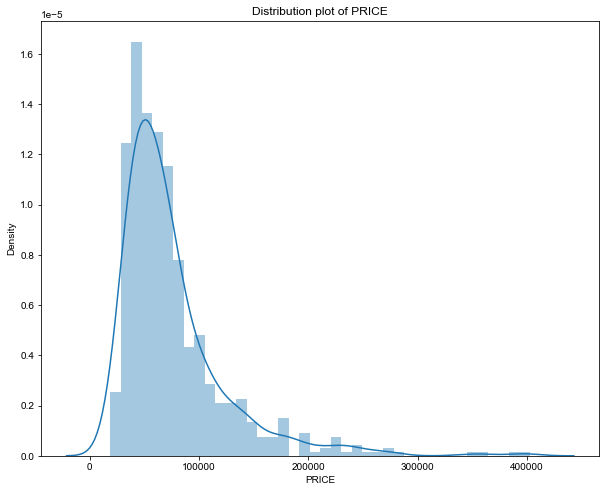

In [99]:
plt.figure(figsize=(10,8))
sns.distplot(df['PRICE'])
sns.set_style('darkgrid')
plt.title('Distribution plot of PRICE')
plt.show()

In [100]:
df.head(1)

,PRICE,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME,GAMING LAPTOP,GRAPHICS CARD
0,69990,8,Windows 10,15.6,0,512,Lenovo,0,Intel,Intel Core i7,1,1


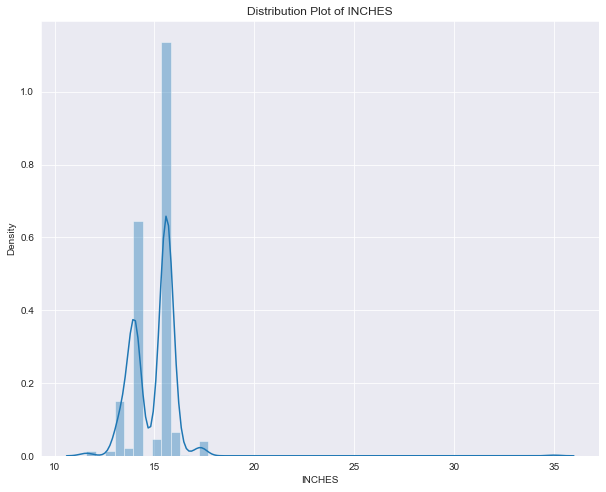

In [101]:
plt.figure(figsize=(10,8))
sns.distplot(df['INCHES'])
plt.title('Distribution Plot of INCHES')
plt.show()


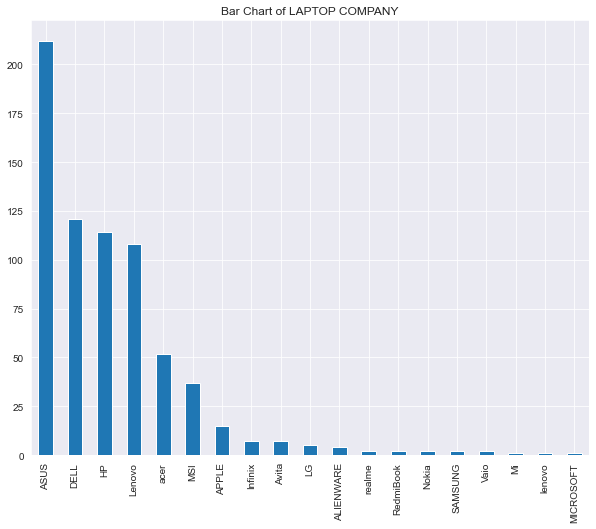

In [102]:
plt.figure(figsize=(10,8))
df['LAPTOP COMPANY'].value_counts().plot(kind='bar')
plt.title('Bar Chart of LAPTOP COMPANY')
plt.show()

Text(0.5, 1.0, 'Bar Chart of PROCESSOR NAME')

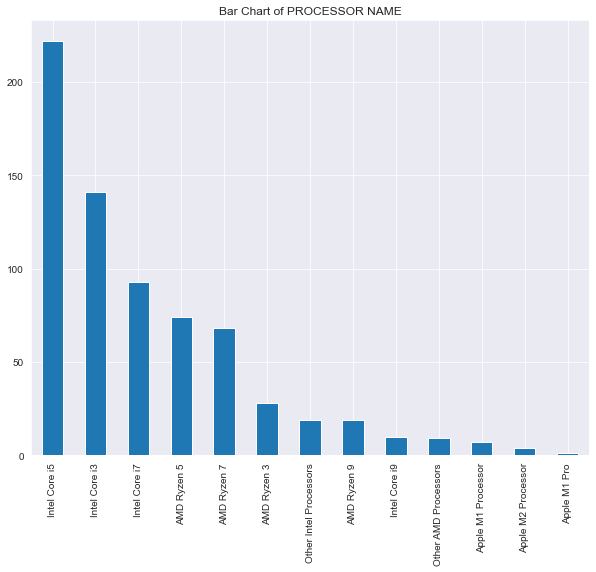

In [103]:
plt.figure(figsize=(10,8))
df['PROCESSORS NAME'].value_counts().plot(kind='bar')
plt.title('Bar Chart of PROCESSOR NAME')

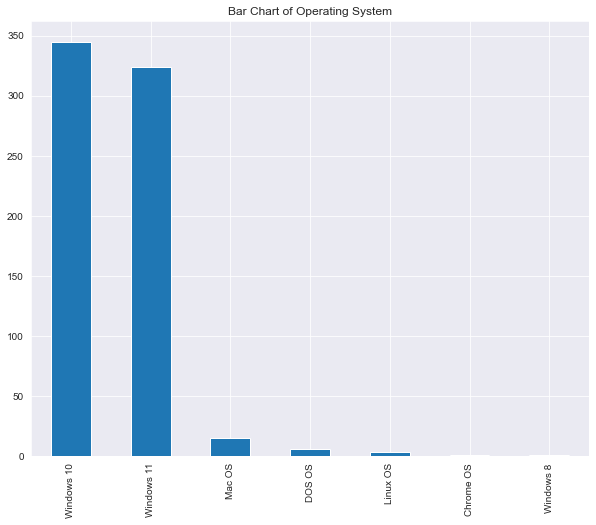

In [104]:
plt.figure(figsize=(10,8))
plt.title('Bar Chart of Operating System')
df['OS'].value_counts().plot(kind='bar');

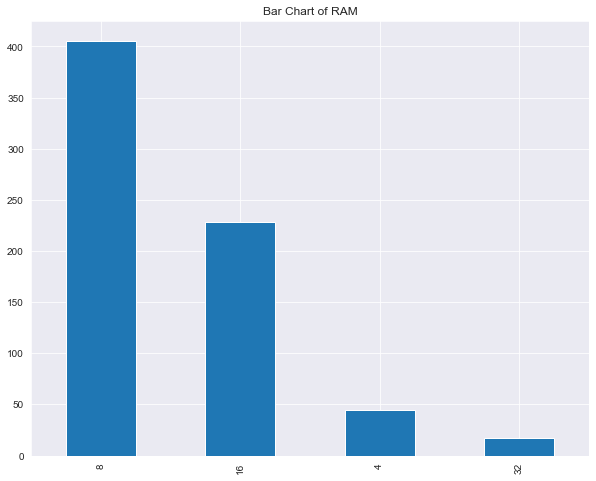

In [105]:
plt.figure(figsize=(10,8))
plt.title('Bar Chart of RAM')
df['RAM'].value_counts().plot(kind='bar');

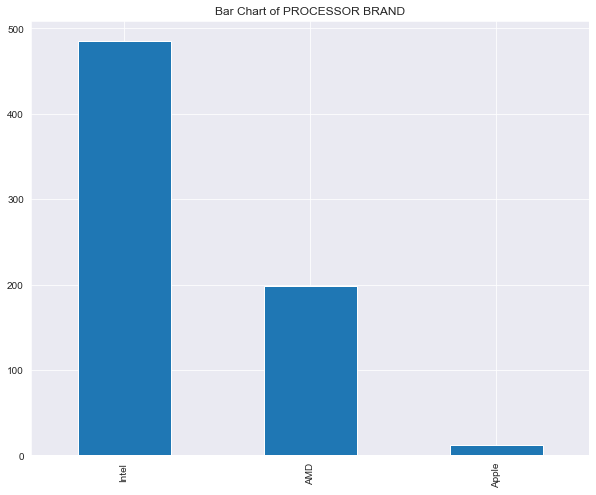

In [106]:
plt.figure(figsize=(10,8))
plt.title('Bar Chart of PROCESSOR BRAND')
df['PROCESSOR BRAND'].value_counts().plot(kind='bar');

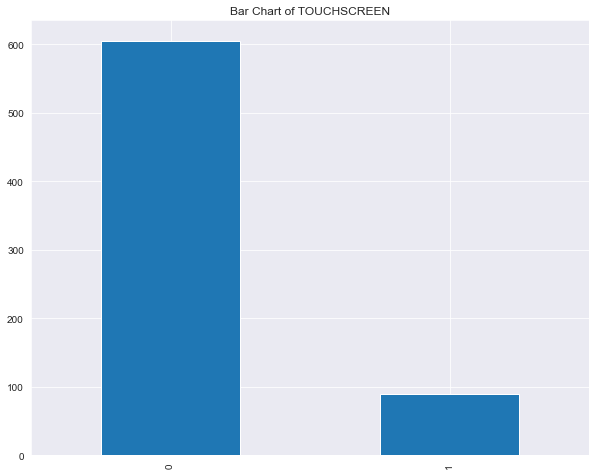

In [107]:
plt.figure(figsize=(10,8))
plt.title('Bar Chart of TOUCHSCREEN')
df['TOUCHSCREEN'].value_counts().plot(kind='bar')
plt.show()                     

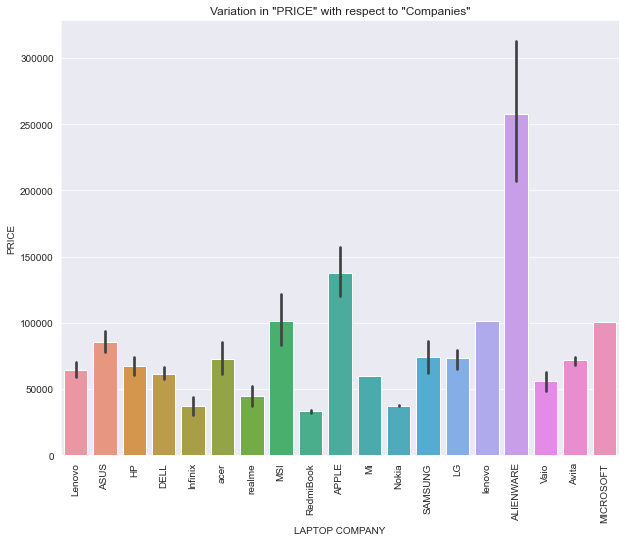

In [108]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['LAPTOP COMPANY'],y=df['PRICE'])
plt.title('Variation in "PRICE" with respect to "Companies"')
plt.xticks(rotation='vertical')
plt.show()

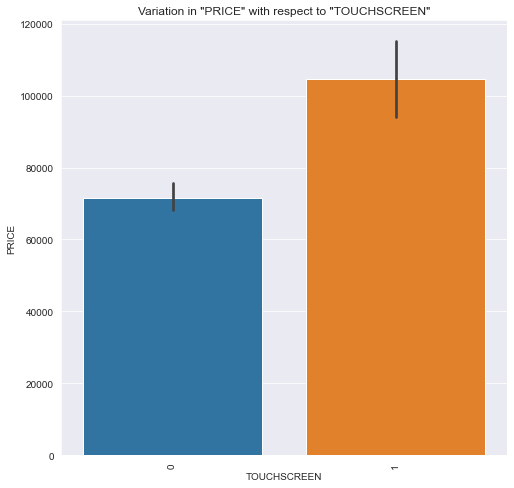

In [109]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['TOUCHSCREEN'],y=df['PRICE'])
plt.title('Variation in "PRICE" with respect to "TOUCHSCREEN"')
plt.xticks(rotation='vertical')
plt.show()

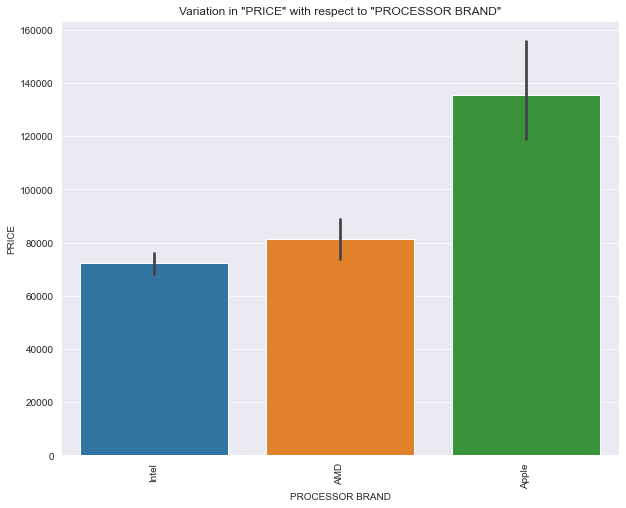

In [110]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['PROCESSOR BRAND'],y=df['PRICE'])
plt.title('Variation in "PRICE" with respect to "PROCESSOR BRAND"')
plt.xticks(rotation='vertical')
plt.show()

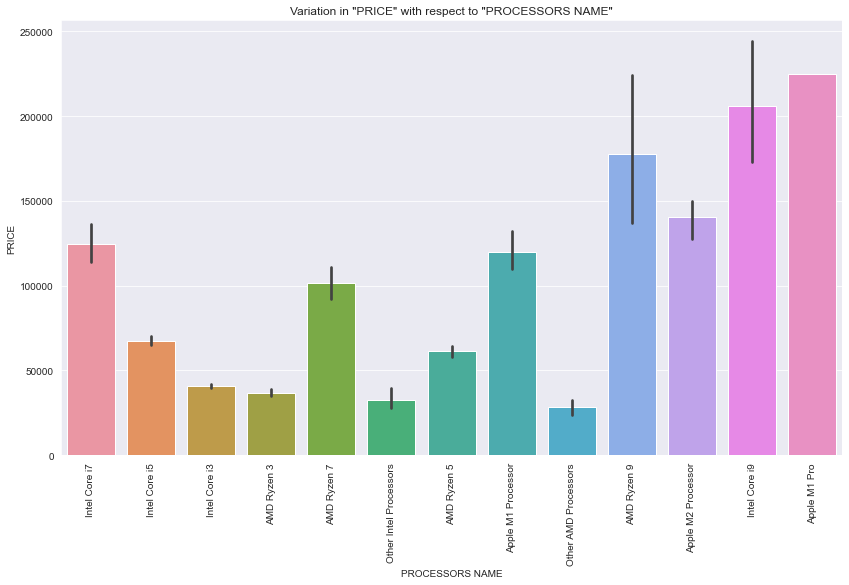

In [111]:
plt.figure(figsize=(14,8))
sns.barplot(x=df['PROCESSORS NAME'],y=df['PRICE'])
plt.title('Variation in "PRICE" with respect to "PROCESSORS NAME"')
plt.xticks(rotation='vertical')
plt.show()

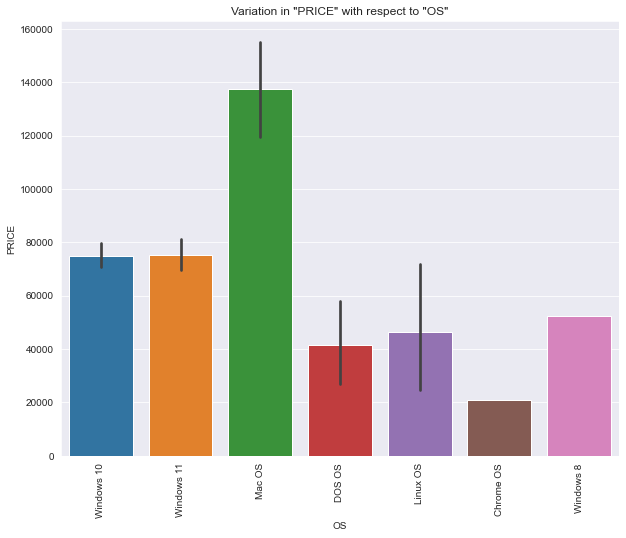

In [112]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['OS'],y=df['PRICE'])
plt.title('Variation in "PRICE" with respect to "OS"')
plt.xticks(rotation='vertical')
plt.show()

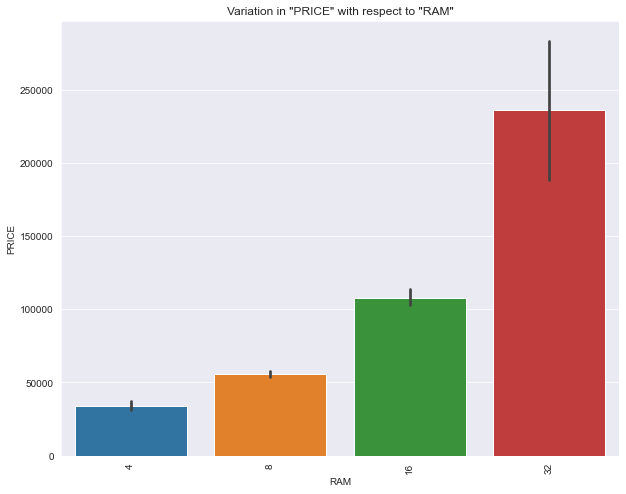

In [113]:
plt.figure(figsize=(10,8))
sns.barplot(x=df['RAM'],y=df['PRICE'])
plt.title('Variation in "PRICE" with respect to "RAM"')
plt.xticks(rotation='vertical')
plt.show()

In [114]:
corr_matrix=df.corr()
corr_matrix

,PRICE,RAM,INCHES,HDD,SSD,TOUCHSCREEN,GAMING LAPTOP,GRAPHICS CARD
PRICE,1.000000,0.730846,-0.013785,-0.185235,0.733958,0.225446,-0.006469,0.436180
RAM,0.730846,1.000000,-0.016991,-0.194173,0.632454,0.224534,0.008104,0.396539
INCHES,-0.013785,-0.016991,1.000000,0.176135,0.023568,-0.341988,0.223239,0.296046
HDD,-0.185235,-0.194173,0.176135,1.000000,-0.485412,-0.155381,0.021218,0.027959
SSD,0.733958,0.632454,0.023568,-0.485412,1.000000,0.142257,0.024977,0.356280
TOUCHSCREEN,0.225446,0.224534,-0.341988,-0.155381,0.142257,1.000000,-0.096571,-0.131771
GAMING LAPTOP,-0.006469,0.008104,0.223239,0.021218,0.024977,-0.096571,1.000000,0.349183
GRAPHICS CARD,0.436180,0.396539,0.296046,0.027959,0.356280,-0.131771,0.349183,1.000000


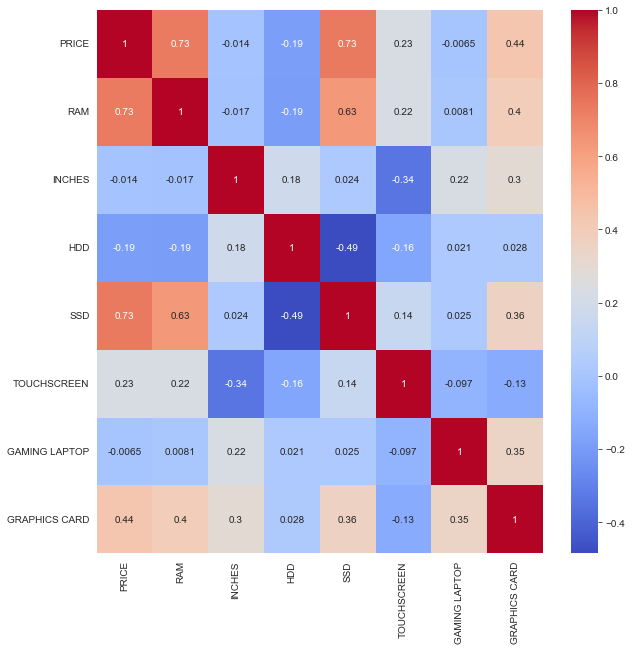

In [115]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm');

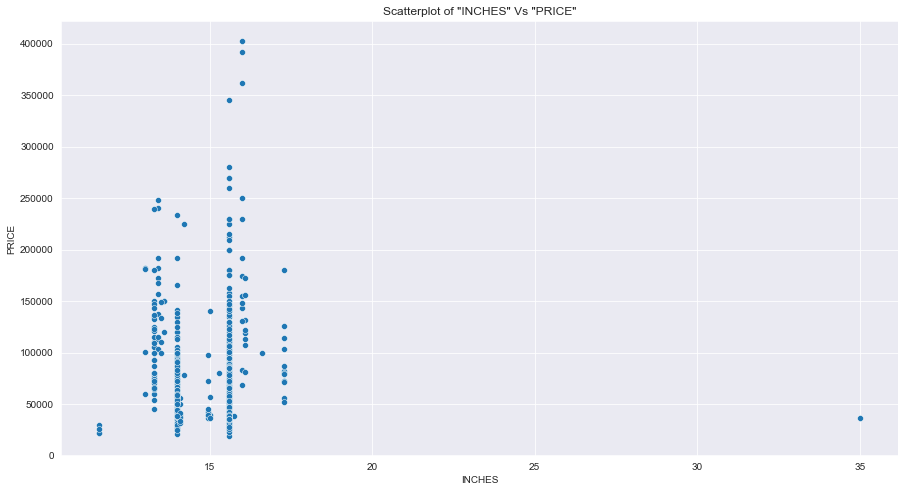

In [116]:
plt.figure(figsize=(15,8))
plt.title('Scatterplot of "INCHES" Vs "PRICE"')
sns.scatterplot(x=df['INCHES'],y=df['PRICE']);

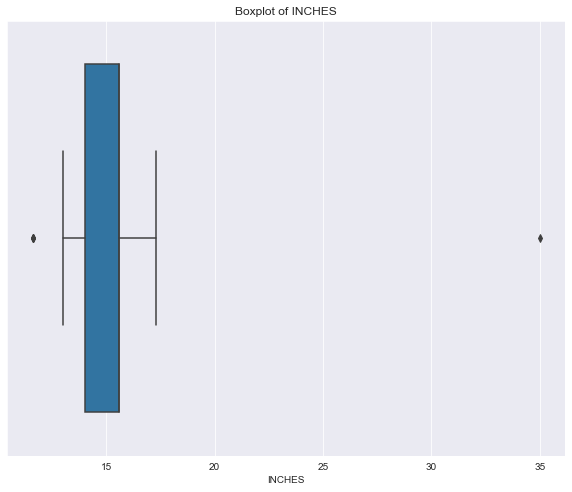

In [117]:
plt.figure(figsize=(10,8))
plt.title('Boxplot of INCHES')
sns.boxplot(df['INCHES']);

In [118]:
#droppig Outlier
df.drop(df[df['INCHES'] == 35].index, inplace = True)

In [119]:
df['INCHES'].value_counts()

15.600    369
14.000    200
13.300     38
16.000     13
17.300     13
13.400     11
14.960      9
14.100      8
16.100      8
15.000      5
13.000      4
11.600      4
13.500      4
13.600      3
16.600      1
15.748      1
14.200      1
15.300      1
14.220      1
Name: INCHES, dtype: int64

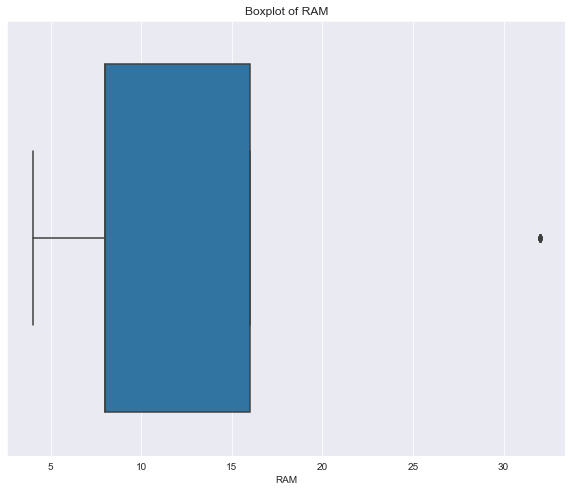

In [120]:
plt.figure(figsize=(10,8))
plt.title('Boxplot of RAM')
sns.boxplot(df['RAM']);

In [121]:
df['RAM'].value_counts()

8     405
16    228
4      44
32     17
Name: RAM, dtype: int64

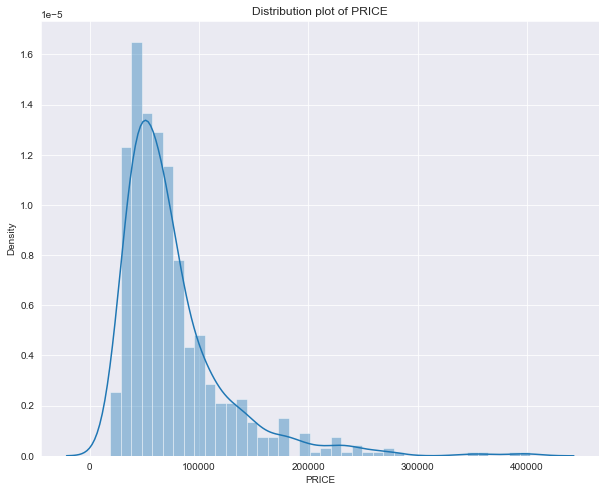

In [122]:
#Distribution of PRICE is positively skewed.
plt.figure(figsize=(10,8))
sns.distplot(df['PRICE'])
sns.set_style('darkgrid')
plt.title('Distribution plot of PRICE')
plt.show() 

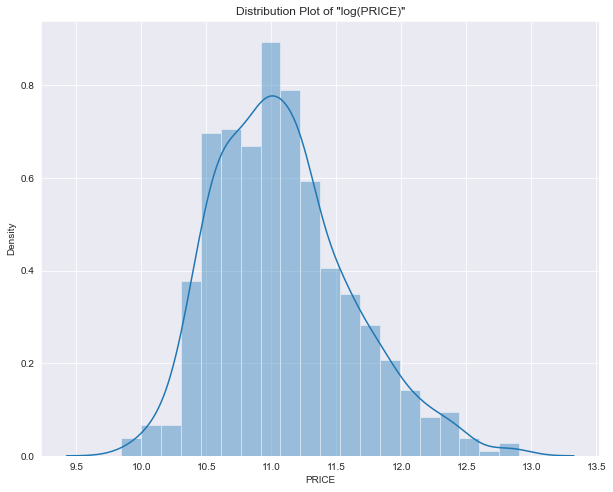

In [123]:
#After 'log transformation' the distribution of 'PRICE'.
plt.figure(figsize=(10,8))
sns.distplot(np.log(df['PRICE']))
plt.title('Distribution Plot of "log(PRICE)"')
plt.show()

In [124]:
df['LAPTOP COMPANY'].value_counts()

ASUS         212
DELL         120
HP           114
Lenovo       108
acer          52
MSI           37
APPLE         15
Infinix        7
Avita          7
LG             5
ALIENWARE      4
realme         2
RedmiBook      2
Nokia          2
SAMSUNG        2
Vaio           2
Mi             1
lenovo         1
MICROSOFT      1
Name: LAPTOP COMPANY, dtype: int64

# DUMMY COLUMNS

In [125]:
# dummies_laptop_company= pd.get_dummies(df['LAPTOP COMPANY'])
# dummies_laptop_company

In [126]:
#dummies_laptop_company.drop(columns=['SAMSUNG'],inplace=True)


In [127]:
#dummies_laptop_company.shape

In [128]:
#make a list of most frequent categories of country
top_7=[x for x in df['LAPTOP COMPANY'].value_counts().sort_values(ascending=False).head(7).index]
top_7

['ASUS', 'DELL', 'HP', 'Lenovo', 'acer', 'MSI', 'APPLE']

In [129]:
#now make 10 binary variables
for label in top_7:
    df[label]=np.where(df['LAPTOP COMPANY']==label,1,0)
    
df.head(50)

,PRICE,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME,GAMING LAPTOP,GRAPHICS CARD,ASUS,DELL,HP,Lenovo,acer,MSI,APPLE
0,69990,8,Windows 10,15.60,0,512,Lenovo,0,Intel,Intel Core i7,1,1,0,0,0,1,0,0,0
1,53990,8,Windows 11,15.60,0,512,Lenovo,0,Intel,Intel Core i5,0,0,0,0,0,1,0,0,0
2,30990,8,Windows 11,15.60,0,256,Lenovo,0,Intel,Intel Core i3,0,0,0,0,0,1,0,0,0
3,31490,8,Windows 11,15.60,0,512,Lenovo,0,AMD,AMD Ryzen 3,0,0,0,0,0,1,0,0,0
4,44990,16,Windows 11,15.60,0,512,ASUS,0,AMD,AMD Ryzen 7,0,0,1,0,0,0,0,0,0
5,31990,8,Windows 11,15.60,0,256,HP,0,AMD,AMD Ryzen 3,0,0,0,0,1,0,0,0,0
6,35999,8,Windows 11,14.00,0,256,HP,0,Intel,Intel Core i3,0,0,0,0,1,0,0,0,0
8,39990,8,Windows 11,14.00,0,512,HP,0,Intel,Intel Core i3,0,0,0,0,1,0,0,0,0
9,38990,8,Windows 11,15.60,0,512,Lenovo,0,Intel,Intel Core i3,0,0,0,0,0,1,0,0,0
10,33990,8,Windows 11,15.60,0,512,ASUS,0,Intel,Intel Core i3,0,0,1,0,0,0,0,0,0


## Dummies for OS

In [130]:
dummies_os=pd.get_dummies(df['OS'])

In [131]:
dummies_os

,Chrome OS,DOS OS,Linux OS,Mac OS,Windows 10,Windows 11,Windows 8
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
977,0,0,0,0,0,1,0
978,0,0,1,0,0,0,0
980,0,0,0,0,1,0,0
981,0,0,0,1,0,0,0


In [132]:
dummies_os.drop(columns=['Linux OS'],inplace=True)

In [133]:
dummies_os.shape

(694, 6)

##Dummies for PROCESSOR BRAND : 

In [134]:
dummies_processor_brand = pd.get_dummies(df['PROCESSOR BRAND'])

In [135]:
dummies_processor_brand

,AMD,Apple,Intel
0,0,0,1
1,0,0,1
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
977,0,0,1
978,0,0,1
980,0,0,1
981,0,1,0


In [136]:
dummies_processor_brand.drop(columns=['Apple'], inplace=True)

In [137]:
dummies_processor_brand.shape

(694, 2)

## Dummies for PROCESSOR NAME : 

In [138]:
dummies_processor_name = pd.get_dummies(df['PROCESSORS NAME'])

In [139]:
dummies_processor_name

,AMD Ryzen 3,AMD Ryzen 5,AMD Ryzen 7,AMD Ryzen 9,Apple M1 Pro,Apple M1 Processor,Apple M2 Processor,Intel Core i3,Intel Core i5,Intel Core i7,Intel Core i9,Other AMD Processors,Other Intel Processors
0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,0,0,0,0,0,0,0,1,0,0,0,0
978,0,0,0,0,0,0,0,0,1,0,0,0,0
980,0,0,0,0,0,0,0,0,0,0,0,0,1
981,0,0,0,0,0,0,1,0,0,0,0,0,0


In [140]:
dummies_processor_name.drop(columns=['Other Intel Processors'],inplace = True)

In [141]:
dummies_processor_name.shape

(694, 12)

##Merging DataFrame : 

In [142]:
merged_df = pd.concat([df,dummies_processor_name,dummies_os,dummies_processor_brand], axis='columns')

In [143]:
merged_df

,PRICE,RAM,OS,INCHES,HDD,SSD,LAPTOP COMPANY,TOUCHSCREEN,PROCESSOR BRAND,PROCESSORS NAME,...,Intel Core i9,Other AMD Processors,Chrome OS,DOS OS,Mac OS,Windows 10,Windows 11,Windows 8,AMD,Intel
0,69990,8,Windows 10,15.6,0,512,Lenovo,0,Intel,Intel Core i7,...,0,0,0,0,0,1,0,0,0,1
1,53990,8,Windows 11,15.6,0,512,Lenovo,0,Intel,Intel Core i5,...,0,0,0,0,0,0,1,0,0,1
2,30990,8,Windows 11,15.6,0,256,Lenovo,0,Intel,Intel Core i3,...,0,0,0,0,0,0,1,0,0,1
3,31490,8,Windows 11,15.6,0,512,Lenovo,0,AMD,AMD Ryzen 3,...,0,0,0,0,0,0,1,0,1,0
4,44990,16,Windows 11,15.6,0,512,ASUS,0,AMD,AMD Ryzen 7,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,78500,16,Windows 11,15.6,0,512,HP,0,Intel,Intel Core i5,...,0,0,0,0,0,0,1,0,0,1
978,72000,8,Linux OS,14.0,0,512,DELL,0,Intel,Intel Core i5,...,0,0,0,0,0,0,0,0,0,1
980,38500,8,Windows 10,14.0,0,256,HP,0,Intel,Other Intel Processors,...,0,0,0,0,0,1,0,0,0,1
981,142990,8,Mac OS,13.3,0,512,APPLE,0,Apple,Apple M2 Processor,...,0,0,0,0,1,0,0,0,0,0


##Dropping Categorical Columns : 

In [144]:
merged_df.drop(columns=['LAPTOP COMPANY','OS','PROCESSOR BRAND','PROCESSORS NAME'], inplace=True)

In [145]:
merged_df.shape

(694, 35)

In [146]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 982
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PRICE                 694 non-null    int64  
 1   RAM                   694 non-null    int64  
 2   INCHES                694 non-null    float64
 3   HDD                   694 non-null    int64  
 4   SSD                   694 non-null    int64  
 5   TOUCHSCREEN           694 non-null    int64  
 6   GAMING LAPTOP         694 non-null    int64  
 7   GRAPHICS CARD         694 non-null    int64  
 8   ASUS                  694 non-null    int32  
 9   DELL                  694 non-null    int32  
 10  HP                    694 non-null    int32  
 11  Lenovo                694 non-null    int32  
 12  acer                  694 non-null    int32  
 13  MSI                   694 non-null    int32  
 14  APPLE                 694 non-null    int32  
 15  AMD Ryzen 3           6

# Before log transformation of 'PRICE' : 

## Seperating Dependent and Independent Variables : 

In [147]:
#Storing independent variables.
x = merged_df.drop(columns=['PRICE'])

In [148]:
x.shape

(694, 34)

In [149]:
#Storing dependent variable.
y = merged_df['PRICE']

In [150]:
y.shape

(694,)

## Splitting of DATA :

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0)

# Linear regression :

In [152]:
lin_reg = LinearRegression()

In [153]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [154]:
y_pred_train = lin_reg.predict(x_train)

In [155]:
r2_score(y_train,y_pred_train) #training

0.7926143360271034

In [156]:
y_pred_test = lin_reg.predict(x_test)

In [288]:
r2_score(y_test,y_pred_test) #testing

0.7872360892293029

In [157]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
model1=sm.OLS(y_train,x_train)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     64.48
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          3.91e-157
Time:                        19:11:00   Log-Likelihood:                -6364.5
No. Observations:                 555   AIC:                         1.279e+04
Df Residuals:                     523   BIC:                         1.293e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
RAM                   2962.6420 

In [159]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(y_test, y_pred_test)

12112.973508867302

In [160]:
# from sklearn.metrics import mean_squared_error

# mean_squared_error(y_test, y_pred_test)

397734470.5327582

## RIDGE REGRESSION

In [161]:
ridge_reg=Ridge(alpha=1,max_iter=100)

In [162]:
ridge_reg.fit(x_train,y_train)

Ridge(alpha=1, max_iter=100)

In [163]:
ridge_reg.score(x_train,y_train)# Training

0.7905116827142029

In [164]:
ridge_reg.score(x_test,y_test)# Testing

0.7922511069199007

In [165]:
model1=sm.OLS(y_train,x_train)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     64.48
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          3.91e-157
Time:                        19:15:23   Log-Likelihood:                -6364.5
No. Observations:                 555   AIC:                         1.279e+04
Df Residuals:                     523   BIC:                         1.293e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
RAM                   2962.6420 

# LASSO REGRESSION

In [172]:
lasso_reg=Lasso(alpha=1,max_iter=100)

In [173]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=1, max_iter=100)

In [174]:
lasso_reg.score(x_train,y_train)

0.7926084132499982

In [175]:
lasso_reg.score(x_test,y_test)

0.7877472200832298

In [177]:
model3=sm.OLS(y_train,x_train)
result=model3.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     64.48
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          3.91e-157
Time:                        19:16:31   Log-Likelihood:                -6364.5
No. Observations:                 555   AIC:                         1.279e+04
Df Residuals:                     523   BIC:                         1.293e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
RAM                   2962.6420 

#KNN : 

In [297]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [298]:
knn_model.score(x_train,y_train) #training

0.8249886845324162

In [299]:
knn_model.score(x_test,y_test) #testing

0.6967088497123675

#SVM

# After log transformation of 'PRICE' : 

## Seperating Dependent and Independent Variables : 

In [178]:
#Storing independent variables.
x1 = merged_df.drop(columns=['PRICE'])

In [179]:
x1.shape

(694, 34)

In [180]:
#Storing dependent variable.
y1 = np.log(merged_df['PRICE'])


In [181]:
y1.shape

(694,)

##Splitting of DATA :

In [182]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1,test_size=0.20,random_state=0)

#Linear regression :

In [183]:
lin_reg = LinearRegression()

In [184]:
lin_reg.fit(x_train1,y_train1)

LinearRegression()

In [185]:
y_pred_train1 = lin_reg.predict(x_train1)

In [186]:
r2_score(y_train1,y_pred_train1) #training

0.8595350731971574

In [187]:
y_pred_test1 = lin_reg.predict(x_test1)

In [188]:
r2_score(y_test1,y_pred_test1) #testing

0.8605577260985481

In [189]:
model1=sm.OLS(y_train1,x_train1)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     103.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          7.10e-201
Time:                        19:18:04   Log-Likelihood:                 115.46
No. Observations:                 555   AIC:                            -166.9
Df Residuals:                     523   BIC:                            -28.71
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
RAM                      0.0238 

## RIDGE REGRESSION

In [190]:
ridge_reg1=Ridge(alpha=1,max_iter=100)

In [191]:
ridge_reg1.fit(x_train1,y_train1)

Ridge(alpha=1, max_iter=100)

In [192]:
ridge_reg1.score(x_train1,y_train1)# Training

0.8552869028051533

In [193]:
ridge_reg1.score(x_test1,y_test1)# Testing

0.8622311780882

# LASSO REGRESSION

In [200]:
lasso_reg1=Lasso(alpha=1,max_iter=1000)

In [201]:
lasso_reg1.fit(x_train1,y_train1)

Lasso(alpha=1)

In [202]:
lasso_reg1.score(x_train1,y_train1)

0.542987913013979

In [203]:
lasso_reg1.score(x_test1,y_test1)

0.49781015147342855

#KNN : 

In [319]:
from sklearn.neighbors import KNeighborsRegressor
knn_model1 = KNeighborsRegressor().fit(x_train1, y_train1)

In [320]:
knn_model1.score(x_train1,y_train1) #training

0.8521502383522472

In [321]:
knn_model1.score(x_test1,y_test1) #testing

0.7529444225481049